# Planillas de Gobierno Central

In [1]:
import pandas as pd
from pathlib import Path

DATASET_PATH = Path().resolve() / 'datasets'
DATASET_PATH

PosixPath('/Users/julio/Documents/Desarrollo/Developer/DataScience/PORTAFOLIO/planillas-gobierno-central/datasets')

In [3]:
old_string = 'InformeConsultaPlanilla_25102023_'
dataframes_list = []
for file_path in DATASET_PATH.iterdir():
    if file_path.is_file() and file_path.suffix == '.xlsx':
        new_filename = file_path.name.replace(old_string, '')

        new_file_path = file_path.parent / new_filename
        file_path.rename(new_file_path)

        df = pd.read_excel(new_file_path, skiprows=4)
        df['SOURCE'] = new_filename

        dataframes_list.append(df)

GOBIERNO_CENTRAL = pd.concat(dataframes_list, ignore_index=True)
GOBIERNO_CENTRAL

Nombre   Apellido         Cédula  \
0                 ABDEL       AMOR  8-0860-001368   
1              ABDIALYS    SANCHEZ  4-0806-001514   
2                ABDIEL   CASTILLO  4-0746-000426   
3                ABDIEL       DIAZ  9-0111-002744   
4                ABDIEL    MENDOZA  9-0131-000037   
...                 ...        ...            ...   
168098  ZULEIMA KRISTEL     DAGHER  8-0839-001387   
168099          ZULEYDE    ROBERTS  3-0704-000627   
168100          ZULEYMA  RODRIGUEZ  8-0440-000169   
168101          ZULIANI  COLINDRES  4-0747-000808   
168102           ZUSETH      BROWN  1-0725-000710   

                                             Cargo  Salario  Gasto  \
0                                 AYUDANTE GENERAL   1000.0      0   
1                               PROMOTOR COMUNAL I   1000.0      0   
2                                INGENIERO CIVIL I   2500.0      0   
3                               PROMOTOR COMUNAL I   1000.0      0   
4                       INGENIERO FORESTAL III (2)   3367.0      0   
...                                            ...      ...    ...   
168098  DIRECTOR NACIONAL DE COMERCIO E INDUSTRIAS   5000.0      0   
168099                       DIRECTOR PROVINCIAL I   1800.0    500   
168100          INSPECTOR DE COMERCIO E INDUSTRIAS   1200.0      0   
168101                              OFICINISTA III   1400.0      0   
168102                                SECRETARIA I    600.0      0   

            Estado Fecha de inicio                                    SOURCE  
0         EVENTUAL      01/09/2023               MINISTERIO_DE_AMBIENTE.xlsx  
1         EVENTUAL      11/05/2023               MINISTERIO_DE_AMBIENTE.xlsx  
2         EVENTUAL      04/09/2023               MINISTERIO_DE_AMBIENTE.xlsx  
3       PERMANENTE      04/01/2021               MINISTERIO_DE_AMBIENTE.xlsx  
4       PERMANENTE      16/04/2003               MINISTERIO_DE_AMBIENTE.xlsx  
...            ...             ...                                       ...  
168098  PERMANENTE      15/07/2019  MINISTERIO_DE_COMERCIO_E_INDUSTRIAS.xlsx  
168099  PERMANENTE      04/09/2019  MINISTERIO_DE_COMERCIO_E_INDUSTRIAS.xlsx  
168100  PERMANENTE      07/03/2022  MINISTERIO_DE_COMERCIO_E_INDUSTRIAS.xlsx  
168101  PERMANENTE      18/09/2023  MINISTERIO_DE_COMERCIO_E_INDUSTRIAS.xlsx  
168102  PERMANENTE      03/05/2022  MINISTERIO_DE_COMERCIO_E_INDUSTRIAS.xlsx  

[168103 rows x 9 columns]

<Axes: ylabel='SOURCE'>

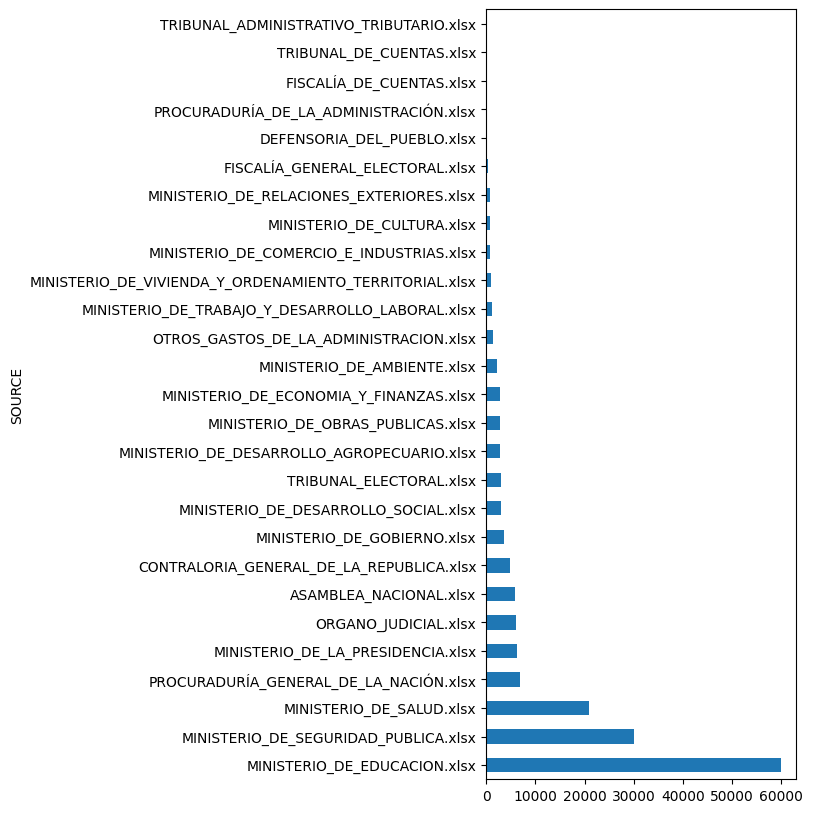

In [15]:
GOBIERNO_CENTRAL['SOURCE'].value_counts().plot.barh(figsize=(4,10))

In [10]:
cedulas_repetidas = GOBIERNO_CENTRAL['Cédula'].value_counts().copy()
cedulas_repetidas = pd.DataFrame(cedulas_repetidas)
cedulas_repetidas['cedula'] = cedulas_repetidas.index
cedulas_repetidas.reset_index(inplace=True,drop=True)
cedulas_repetidas = cedulas_repetidas.query('count >= 2')
print(len(cedulas_repetidas))
cedulas_repetidas

252


count          cedula
0        2   6-0080-000173
1        2   9-0101-000098
2        2   8-0765-000321
3        2   4-0125-002566
4        2   3-0725-001591
..     ...             ...
247      2   8-0308-000305
248      2   4-0112-000452
249      2  10-0019-000511
250      2   4-0123-000935
251      2   2-0702-001207

[252 rows x 2 columns]

In [11]:
union = GOBIERNO_CENTRAL.merge(cedulas_repetidas, left_on='Cédula', right_on='cedula')
union

Nombre  Apellido         Cédula  \
0    FERNANDO   JOHNSON  3-0081-002521   
1    FERNANDO   JOHNSON  3-0081-002521   
2       IBETH  DE CHIRU  2-0087-001234   
3       IBETH  DE CHIRU  2-0087-001234   
4        JOSE     PRADO  7-0121-000221   
..        ...       ...            ...   
499    SHAMIA     REYES  8-0481-000994   
500    SHERLY    RAMSEY  8-0413-000976   
501    SHERLY    RAMSEY  8-0413-000976   
502     SIMON    MARTES  8-0735-001578   
503     SIMON    MARTES  8-0735-001578   

                                                 Cargo  Salario  Gasto  \
0                                          INSPECTOR I   600.00      0   
1                       REPRESENTANTE DE CORREGIMIENTO  2000.00      0   
2                           INGENIERO FORESTAL III (1)  3367.00      0   
3                       REPRESENTANTE DE CORREGIMIENTO  2000.00      0   
4                                      ADMINISTRADOR I   700.00      0   
..                                                 ...      ...    ...   
499  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1791.10      0   
500  EDUCADOR N 22 (PROFESOR EDUC. SEC. 1RA. CAT. T...  1860.14      0   
501                                   PROMOTOR COMUNAL   371.00      0   
502  EDUCADOR B 1 (MAESTRO CON TIT. DE MAESTRO DE E...  1671.52      0   
503  EDUCADOR M 1 (PROFESOR EDUC. SEC. 2DA. CAT. TI...   284.00      0   

                        Estado Fecha de inicio  \
0                   PERMANENTE      03/01/2005   
1                   PERMANENTE      02/07/2019   
2                   PERMANENTE      03/07/2006   
3                   PERMANENTE      03/07/2019   
4                   PERMANENTE      01/09/2011   
..                         ...             ...   
499                 PERMANENTE      01/05/2022   
500                 PERMANENTE      23/02/2015   
501                   EVENTUAL      08/03/2023   
502     PERIODO PROB. DE 1 AÑO      11/03/2011   
503  INTERINO HASTA FIN DE AÑO      01/06/2023   

                                     SOURCE  count         cedula  
0               MINISTERIO_DE_AMBIENTE.xlsx      2  3-0081-002521  
1    OTROS_GASTOS_DE_LA_ADMINISTRACION.xlsx      2  3-0081-002521  
2               MINISTERIO_DE_AMBIENTE.xlsx      2  2-0087-001234  
3    OTROS_GASTOS_DE_LA_ADMINISTRACION.xlsx      2  2-0087-001234  
4               MINISTERIO_DE_AMBIENTE.xlsx      2  7-0121-000221  
..                                      ...    ...            ...  
499            MINISTERIO_DE_EDUCACION.xlsx      2  8-0481-000994  
500            MINISTERIO_DE_EDUCACION.xlsx      2  8-0413-000976  
501            MINISTERIO_DE_EDUCACION.xlsx      2  8-0413-000976  
502            MINISTERIO_DE_EDUCACION.xlsx      2  8-0735-001578  
503            MINISTERIO_DE_EDUCACION.xlsx      2  8-0735-001578  

[504 rows x 11 columns]

In [12]:
duplicados_salario = union['Salario'].sum()
print(f'Duplicados Salario Mensual: ${duplicados_salario:,.2f}')
print(f'Duplicados Salario Anual: ${duplicados_salario*12:,.2f}')

Duplicados Salario Mensual: $636,832.57
Duplicados Salario Anual: $7,641,990.84


In [16]:
GOBIERNO_CENTRAL.columns

Index(['Nombre', 'Apellido', 'Cédula', 'Cargo', 'Salario', 'Gasto', 'Estado',
       'Fecha de inicio', 'SOURCE'],
      dtype='object')

In [22]:
GOBIERNO_CENTRAL.query('SOURCE == "TRIBUNAL_ELECTORAL.xlsx" and Cargo == "MAGISTRADO"')

Nombre Apellido         Cédula       Cargo  Salario  Gasto  \
164394  ALFREDO    JUNCA  8-0433-000226  MAGISTRADO   6000.0   4000   
165018  EDUARDO   VALDES  8-0128-000025  MAGISTRADO   6000.0   4000   
166076     LUIS   GUERRA  4-0157-000751  MAGISTRADO   6000.0   4000   

            Estado Fecha de inicio                   SOURCE  
164394  PERMANENTE      04/01/2017  TRIBUNAL_ELECTORAL.xlsx  
165018  PERMANENTE      01/01/2007  TRIBUNAL_ELECTORAL.xlsx  
166076  PERMANENTE      16/11/2022  TRIBUNAL_ELECTORAL.xlsx

## Calculo de Años Según Fecha de Inicio

In [23]:
anios = GOBIERNO_CENTRAL.copy()
anios.head(2)

Nombre Apellido         Cédula               Cargo  Salario  Gasto  \
0     ABDEL     AMOR  8-0860-001368    AYUDANTE GENERAL   1000.0      0   
1  ABDIALYS  SANCHEZ  4-0806-001514  PROMOTOR COMUNAL I   1000.0      0   

     Estado Fecha de inicio                       SOURCE  
0  EVENTUAL      01/09/2023  MINISTERIO_DE_AMBIENTE.xlsx  
1  EVENTUAL      11/05/2023  MINISTERIO_DE_AMBIENTE.xlsx

In [25]:
import pandas as pd
from datetime import datetime

# Assuming that "Fecha de inicio" is a string in the format 'dd/mm/yyyy'
# You can convert it to a datetime object with the correct format
anios['Fecha de inicio'] = pd.to_datetime(anios['Fecha de inicio'], format='%d/%m/%Y')

# Calculate the difference in years
current_date = datetime.now()
anios['years'] = (current_date - anios['Fecha de inicio']).dt.days // 365


In [29]:
print('cantidad de personas que trabajan hace más de 30 anios: ', str(len(anios.query('years >= 30'))))
anios.query('years >= 30 and SOURCE == "TRIBUNAL_ELECTORAL.xlsx"')

cantidad de personas que trabajan hace más de 30 anios:  11901


Nombre    Apellido         Cédula                              Cargo  \
164320  AGUSTIN   RODRIGUEZ  8-0421-000035                       OFICINISTA I   
164346  ALBERTO     MENDOZA  6-0058-000096              REGISTRADOR CEDULAR I   
164392  ALFONSO     URRUTIA  9-0106-000649        ASISTENTE ADMINISTRATIVO II   
164400    ALINA  DE SANCHEZ  2-0121-000071                       SECRETARIA I   
164442      ANA      DUARTE  8-0239-001268              ASISTENTE EJECUTIVO I   
...         ...         ...            ...                                ...   
167119   YARA I     CAMPO B  8-0224-002107   DIRECTOR EJECUTIVO INSTITUCIONAL   
167238    ZAIDA     ARROCHA  2-0162-002369  REVISOR DE INFORMACION DOCUMENTAL   
167242  ZAIRA E    APARICIO  4-0288-000331              REGISTRADOR ELECTORAL   
167252  ZENAIDA  DE JIMENEZ  9-0101-001374                          AUDITOR I   
167261    ZULAY   CANDANEDO  8-0370-000801              REGISTRADOR CEDULAR I   

        Salario  Gasto      Estado Fecha de inicio                   SOURCE  \
164320    800.0      0  PERMANENTE      1982-10-01  TRIBUNAL_ELECTORAL.xlsx   
164346    840.0      0  PERMANENTE      1989-11-01  TRIBUNAL_ELECTORAL.xlsx   
164392   1520.0      0  PERMANENTE      1990-12-01  TRIBUNAL_ELECTORAL.xlsx   
164400    950.0      0  PERMANENTE      1992-03-10  TRIBUNAL_ELECTORAL.xlsx   
164442   2200.0      0  PERMANENTE      1993-01-04  TRIBUNAL_ELECTORAL.xlsx   
...         ...    ...         ...             ...                      ...   
167119   6750.0      0  PERMANENTE      1990-10-20  TRIBUNAL_ELECTORAL.xlsx   
167238    800.0      0  PERMANENTE      1981-02-20  TRIBUNAL_ELECTORAL.xlsx   
167242    825.0      0  PERMANENTE      1993-02-16  TRIBUNAL_ELECTORAL.xlsx   
167252   2265.0      0  PERMANENTE      1983-01-17  TRIBUNAL_ELECTORAL.xlsx   
167261    800.0      0  PERMANENTE      1987-10-16  TRIBUNAL_ELECTORAL.xlsx   

        years  
164320     41  
164346     34  
164392     32  
164400     31  
164442     30  
...       ...  
167119     33  
167238     42  
167242     30  
167252     40  
167261     36  

[180 rows x 10 columns]